In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [3]:
# Load the dataset
df = pd.read_csv('customer_data.csv')

In [4]:
# 1. What are the features used in this dataset for customer segmentation?
print("The features used in this dataset for customer segmentation are:")
print(df.columns)


The features used in this dataset for customer segmentation are:
Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


In [5]:
# 2. What are the total no of missing values in the dataset?
print("The total number of missing values in the dataset is:")
print(df.isnull().sum().sum())

The total number of missing values in the dataset is:
3


In [6]:
# 3. Replace the missing values with mean in case of numerical feature and mode in case of categorical feature.
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Annual Income (k$)'] = df['Annual Income (k$)'].fillna(df['Annual Income (k$)'].mean())
df['Spending Score (1-100)'] = df['Spending Score (1-100)'].fillna(df['Spending Score (1-100)'].mean())
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])

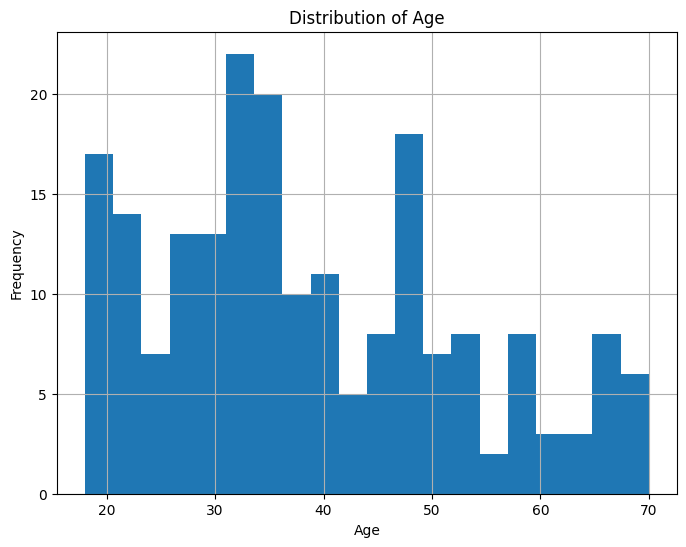

In [7]:
# 4. What is the distribution of the 'Age' feature in the dataset?
plt.figure(figsize=(8, 6))
df['Age'].hist(bins=20)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [8]:
# 5. Which feature has the highest correlation with the 'Spending Score (1-100)' feature?
corr_matrix = df.select_dtypes(include=[np.number]).corr()
print("The feature with the highest correlation with 'Spending Score (1-100)' is:")
print(corr_matrix['Spending Score (1-100)'].abs().sort_values(ascending=False).index[0])


The feature with the highest correlation with 'Spending Score (1-100)' is:
Spending Score (1-100)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

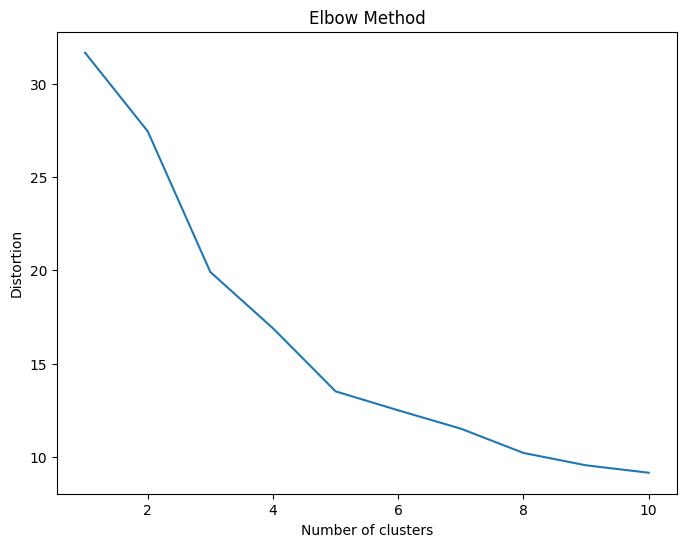

The optimal number of clusters according to the Elbow Method is: 10


In [9]:
# 6. What is the optimal number of clusters for customer segmentation according to the Elbow Method?
distortions = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
    distortions.append(sum(np.min(cdist(df[['Annual Income (k$)', 'Spending Score (1-100)']], kmeans.cluster_centers_, 'euclidean'), axis=1)) / df.shape[0])

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), distortions)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()
print("The optimal number of clusters according to the Elbow Method is:", distortions.index(min(distortions)) + 1)

In [10]:

# 7. What is the average annual income of customers in the dataset?
print("The average annual income of customers in the dataset is:")
print(df['Annual Income (k$)'].mean())

The average annual income of customers in the dataset is:
61.31683168316832


In [11]:
# 8. What is the average spending score of male customers in the dataset?
print("The average spending score of male customers in the dataset is:")
print(df.loc[df['Gender'] == 'Male', 'Spending Score (1-100)'].mean())

The average spending score of male customers in the dataset is:
48.17977528089887


In [12]:
# 9. Which cluster has the highest average income and spending score?
kmeans = KMeans(n_clusters=5, random_state=0)
df['Cluster'] = kmeans.fit_predict(df[['Annual Income (k$)', 'Spending Score (1-100)']])
cluster_stats = df.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean()
print("The cluster with the highest average income and spending score is:")
print(cluster_stats.idxmax())

The cluster with the highest average income and spending score is:
Annual Income (k$)        0
Spending Score (1-100)    2
dtype: int32


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [13]:
# 10. What is the percentage of customers in Cluster 1?
print("The percentage of customers in Cluster 1 is:")
print(df.loc[df['Cluster'] == 0].shape[0] / df.shape[0] * 100)


The percentage of customers in Cluster 1 is:
17.733990147783253


In [14]:
# 11. What is the most frequent age group in Cluster 2?
print("The most frequent age group in Cluster 2 is:")
print(df.loc[df['Cluster'] == 1, 'Age'].mode()[0])

The most frequent age group in Cluster 2 is:
19.0


In [15]:
# 12. What is the average income of customers in Cluster 3?
print("The average income of customers in Cluster 3 is:")
print(df.loc[df['Cluster'] == 2, 'Annual Income (k$)'].mean())

The average income of customers in Cluster 3 is:
87.8


In [16]:
# 13. Show the count of value in each cluster
print("The count of values in each cluster is:")
print(df['Cluster'].value_counts())

The count of values in each cluster is:
Cluster
1    82
2    40
0    36
3    23
4    22
Name: count, dtype: int64


In [17]:
# 14. Show customers from each cluster
for i in range(5):
    print(f"Customers in Cluster {i+1}:")
    print(df.loc[df['Cluster'] == i].head())

Customers in Cluster 1:
     CustomerID  Gender   Age  Annual Income (k$)  Spending Score (1-100)  \
124         125  Female  23.0                70.0                      29   
128         129    Male  59.0                71.0                      11   
130         131    Male  47.0                71.0                       9   
134         135    Male  20.0                73.0                       5   
136         137  Female  44.0                73.0                       7   

     Cluster  
124        0  
128        0  
130        0  
134        0  
136        0  
Customers in Cluster 2:
    CustomerID  Gender   Age  Annual Income (k$)  Spending Score (1-100)  \
43          44  Female  31.0                39.0                      61   
46          47  Female  50.0                40.0                      55   
47          48  Female  27.0                40.0                      47   
48          49  Female  29.0                40.0                      42   
49          50  Fem

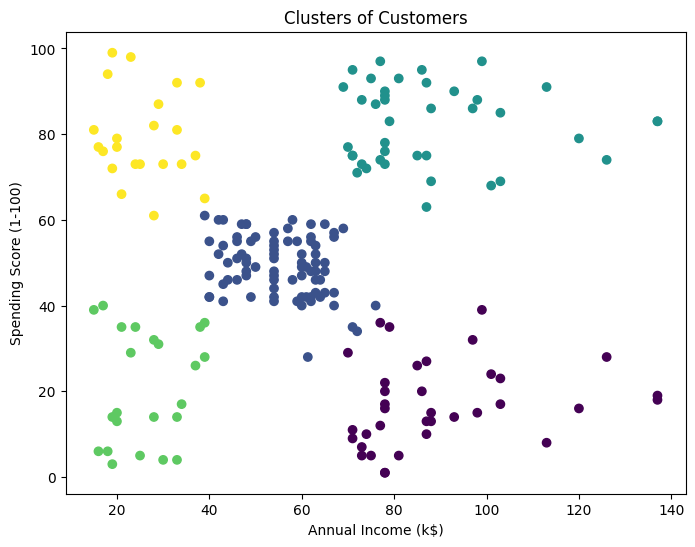

In [18]:
# 15. Make a visualization of the clusters
plt.figure(figsize=(8, 6))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['Cluster'])
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

The features used in this dataset for customer segmentation are:
Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')
The total number of missing values in the dataset is:
3


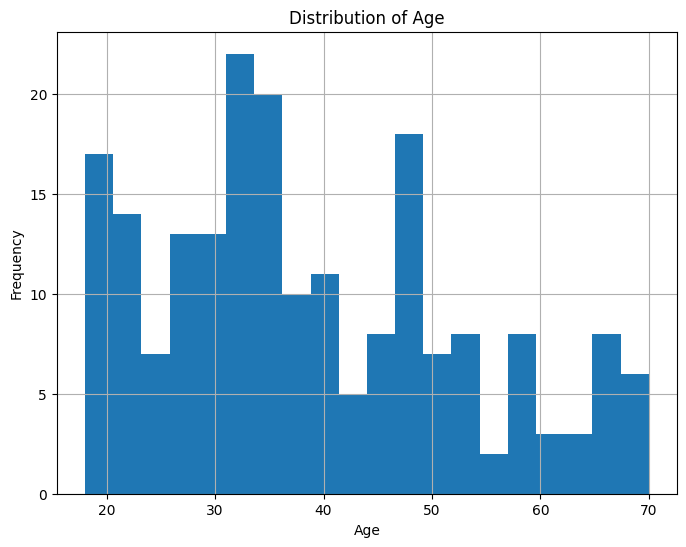

The feature with the highest correlation with 'Spending Score (1-100)' is:
Spending Score (1-100)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

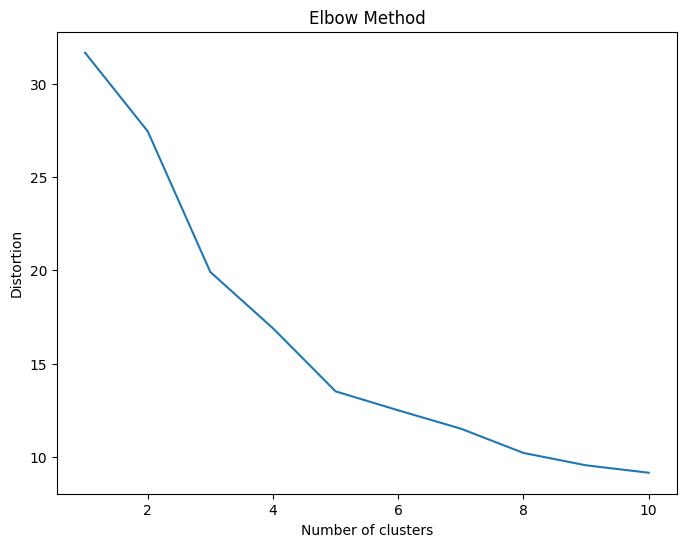

The optimal number of clusters according to the Elbow Method is: 10
The average annual income of customers in the dataset is:
61.31683168316832
The average spending score of male customers in the dataset is:
48.17977528089887
The cluster with the highest average income and spending score is:
Annual Income (k$)        0
Spending Score (1-100)    2
dtype: int32
The percentage of customers in Cluster 1 is:
17.733990147783253
The most frequent age group in Cluster 2 is:
19.0
The average income of customers in Cluster 3 is:
87.8
The count of values in each cluster is:
Cluster
1    82
2    40
0    36
3    23
4    22
Name: count, dtype: int64
Customers in Cluster 1:
     CustomerID  Gender   Age  Annual Income (k$)  Spending Score (1-100)  \
124         125  Female  23.0                70.0                      29   
128         129    Male  59.0                71.0                      11   
130         131    Male  47.0                71.0                       9   
134         135    Male 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


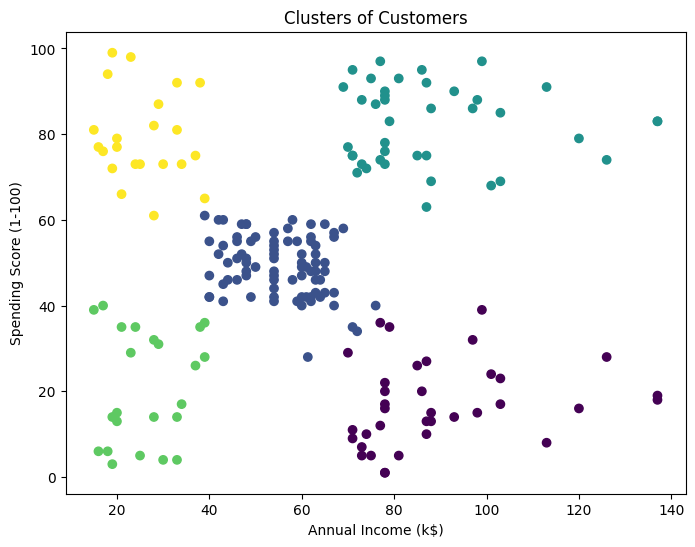